# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

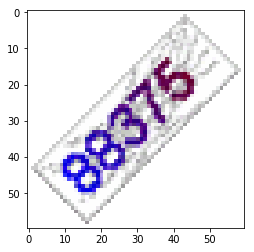

[[ 175.49458031 -133.40097667]
 [-133.40097667  175.57951524]]
[[ 0.70699422 -0.70721932]
 [-0.70721932 -0.70699422]] [308.9380312   42.13606435]


<function matplotlib.pyplot.show(*args, **kw)>

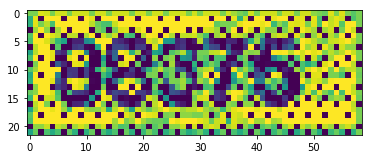

In [131]:
from hack_pca import hack_pca

# Hack different images yourself

plt.imshow(plt.imread('4.gif'))
plt.show()

img = hack_pca('4.gif')
plt.imshow(img)
plt.show

## Apply PCA on face image

In [165]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
def feature_normal(X):
    avg = np.average(X, axis = 0).reshape(1, X.shape[1])
    std = np.std(X, axis = 0).reshape(1, X.shape[1])
    std[std == 0] = 1.0
    return (X - avg) / std
# begin answer
fea_Train = feature_normal(fea_Train)
fea_Test = feature_normal(fea_Test)
# end answer

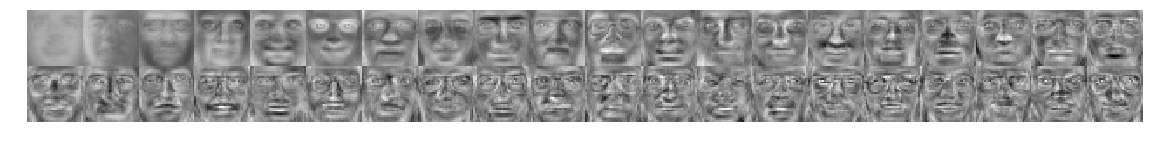

In [166]:
# 2. Run PCA
# begin answer
from pca import PCA
eigen_vec, eigen_val = PCA(fea_Train.T)
eigen_vec = np.real(eigen_vec)
eigen_val = np.real(eigen_val)
# end answer
# 3. Visualize eigenface
# begin answer
from show_face import show_face
show_face(eigen_vec.T)
# end answer

Error rate for k =  8: 0.26


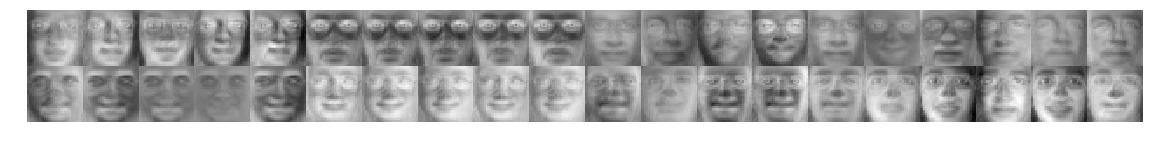

Error rate for k = 16: 0.18500000000000005


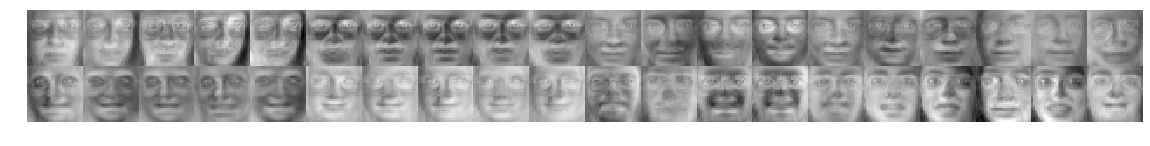

Error rate for k = 32: 0.14500000000000002


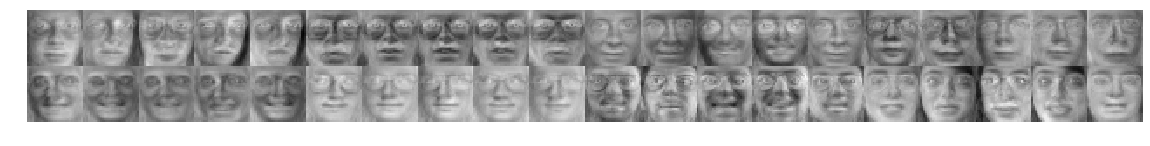

Error rate for k = 64: 0.12


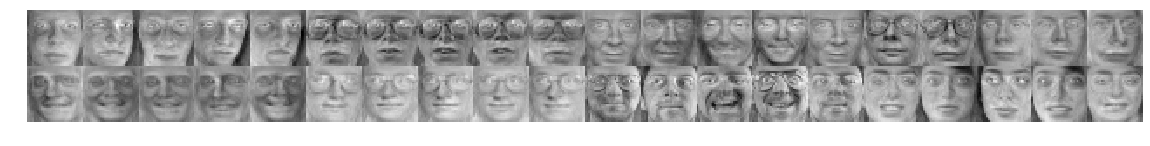

Error rate for k = 128: 0.125


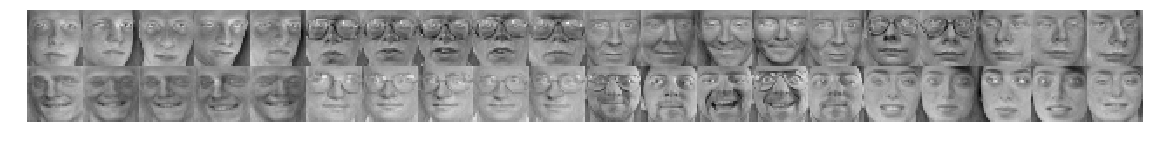

In [167]:
from knn import knn

k_list = [8, 16, 32, 64, 128]
for k in k_list:
    # 4. Project data on to low dimensional space
    # begin answer
    compress_Train = np.matmul(fea_Train, eigen_vec[:, :k])
    compress_Test = np.matmul(fea_Test, eigen_vec[:, :k])
    # end answer
    # 5. Run KNN in low dimensional space
    # begin answer
    pred_Test = knn(compress_Test, compress_Train, gnd_Train, 1)
    error_rate = 1.0 - np.sum(pred_Test == gnd_Test) / pred_Test.shape[0]
    print ("Error rate for k = %2d:" % k, error_rate)
    # end answer
    # 6. Recover face images form low dimensional space, visualize them
    # begin answer
    rebuild = np.matmul(compress_Train, eigen_vec[:, :k].T)
    show_face(rebuild)
    # end answer  

## You are encouraged to apply LDA on this dataset!

In [176]:
from LDA import LDA

#print (LDA.__doc__)
# Your code here
# begin answer
eigen_vec, eigen_val = LDA(fea_Train, gnd_Train)
compress_Train = np.matmul(fea_Train, eigen_vec)
compress_Test = np.matmul(fea_Test, eigen_vec)
pred_Test = knn(compress_Test, compress_Train, gnd_Train, 1)
error_rate = 1.0 - np.sum(pred_Test == gnd_Test) / pred_Test.shape[0]
print ("Error rate for LDA:", error_rate)
# end answer

Error rate for LDA: 0.030000000000000027
